# Physics 300 
## Computational Physics I (Fall 2017)
## BPB-248, Tues/Thurs 10:00 - 11:15 am 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Tues/Thurs 8:30 - 10:00 |

# 17 Local Optmization (II)

## 17.1 Gradient descent on 2D


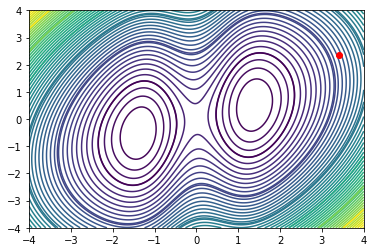

In [195]:
import numpy as np
import matplotlib.pyplot as plt

def f2(x):
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-x[0]**2)
    #return (1-x[0])**2 + 100*(x[1]-x[0]**2)**2

#def f2(x):
#    p = np.exp(-(x[0]/4-x[1]/1)**2)
#    return p

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()


In [209]:
# variable stepwidth
def derivative2(f, xy, d=0.005):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize2(f,x0, N=1000):
    """
    x0: 1*2 array
    """
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    for i in range(N):
        
        df_now = derivative2(f2, x_now) 
        
        if x_prev is None:
            dx = 0.01
        else:
            df_prev = derivative2(f2, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
            print(df_now, dx)
          
        x_next = x_now - df_now*dx
        
        #print(x_next, x_now, dx)
        if f(x_next) < f(x_now):
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)
        else:
            converged = True
            break
    return converged, np.array(x_hist), gauss(x_now)



[-2.09525264  2.25801889] 0.342485784952
[ 0.47144304  1.56306075] 0.336489939715
[ 0.16877447  1.25208356] 1.12350985862
[-0.09747625  0.36166969] 1.50864540996
[ 0.52694424 -0.03884879] 0.563968495246
[-0.50855523  0.05005252] 0.286695230338


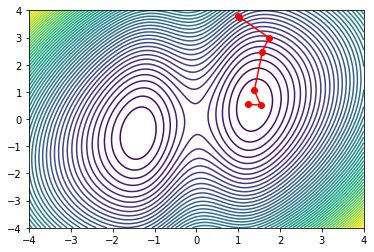

In [213]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize2(gauss, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()


## 17.2 Conjungate Gradient
